# 01. Import Libraries

In [171]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# 02. Import Data

In [172]:
# Path to main folder
path = r'C:\Users\jmacs\Documents\Career Foundry Tasks\KingCountySales'

In [173]:
# Import kc_house_data
kc_house_data = pd.read_csv(os.path.join(path, 'kc_house_data_clean.csv'), index_col = False)

In [174]:
kc_house_data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Price category
0,0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,...,1180,0,1955,NaN,98178,47.5112,-122.257,1340,5650,Low price
1,1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,Middle price
2,2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,...,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062,Low price
3,3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,...,1050,910,1965,NaN,98136,47.5208,-122.393,1360,5000,Middle price
4,4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,...,1680,0,1987,NaN,98074,47.6168,-122.045,1800,7503,Middle price


# 03. Subset, Wrangle, Clean Time Data

In [175]:
# creating dataframe with just values we need for date and counts of date
kc_date = kc_house_data['date'].value_counts().rename_axis('date').reset_index(name='homes_sold')

In [176]:
kc_date.head()

,date,homes_sold
0,2014-06-23,142
1,2014-06-26,131
2,2014-06-25,131
3,2014-07-08,127
4,2015-04-27,126


In [177]:
# Shorten dates to drop May 2015 dates as it is the only month with 2014 and 2015 data and seems to be half the values of all months before
kc_date_sub = kc_date.loc[(kc_date['date'] >= '2014-05-02') & (kc_date['date'] <= '2015-04-30')]

In [178]:
kc_date_sub.head()

,date,homes_sold
0,2014-06-23,142
1,2014-06-26,131
2,2014-06-25,131
3,2014-07-08,127
4,2015-04-27,126


In [179]:
kc_date_sub.tail()

,date,homes_sold
366,2015-01-17,1
367,2014-11-02,1
368,2015-01-31,1
370,2014-05-17,1
371,2014-07-27,1


In [180]:
kc_date_sub.shape

(355, 2)

In [181]:
# Set the "date" column as the index

from datetime import datetime

kc_date_sub['datetime'] = pd.to_datetime(kc_date_sub['date']) # Create a datetime column from "date.""
kc_date_sub = kc_date_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
kc_date_sub.drop(['date'], axis=1, inplace=True) # Drop the "date" column.
kc_date_sub.head()

,homes_sold
datetime,
2014-06-23,142
2014-06-26,131
2014-06-25,131
2014-07-08,127
2015-04-27,126


In [182]:
kc_date_sorted = kc_date_sub.index.sort_values() # Sort the datetime as the index of the dataframe.

In [183]:
kc_date_sorted

DatetimeIndex(['2014-05-02', '2014-05-03', '2014-05-04', '2014-05-05',
               '2014-05-06', '2014-05-07', '2014-05-08', '2014-05-09',
               '2014-05-10', '2014-05-11',
               ...
               '2015-04-21', '2015-04-22', '2015-04-23', '2015-04-24',
               '2015-04-25', '2015-04-26', '2015-04-27', '2015-04-28',
               '2015-04-29', '2015-04-30'],
              dtype='datetime64[ns]', name='datetime', length=355, freq=None)

In [184]:
kc_date_sub = kc_date_sub.loc[kc_date_sorted]

In [185]:
kc_date_sub.head()

,homes_sold
datetime,
2014-05-02,67
2014-05-03,4
2014-05-04,5
2014-05-05,84
2014-05-06,83


In [186]:
kc_date_sub.columns

Index(['homes_sold'], dtype='object')

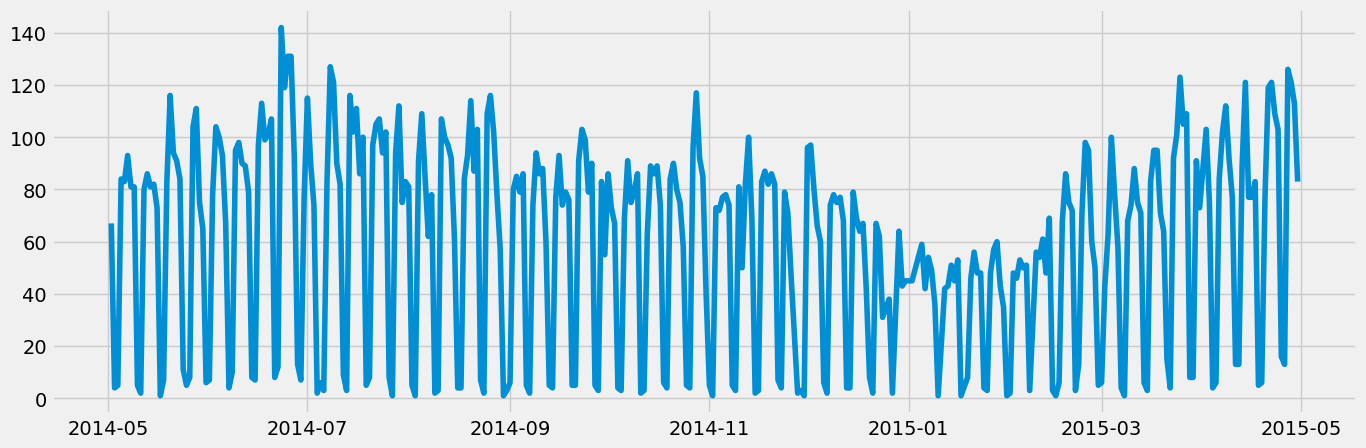

In [187]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(kc_date_sub)

In [188]:
# Check for missing values (you shouldn't have any)

kc_date_sub.isnull().sum() 

homes_sold    0
dtype: int64

# 04. Time Series Analysis: Decomposition

In [190]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(kc_date_sub, model='additive', period=7)

In [191]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

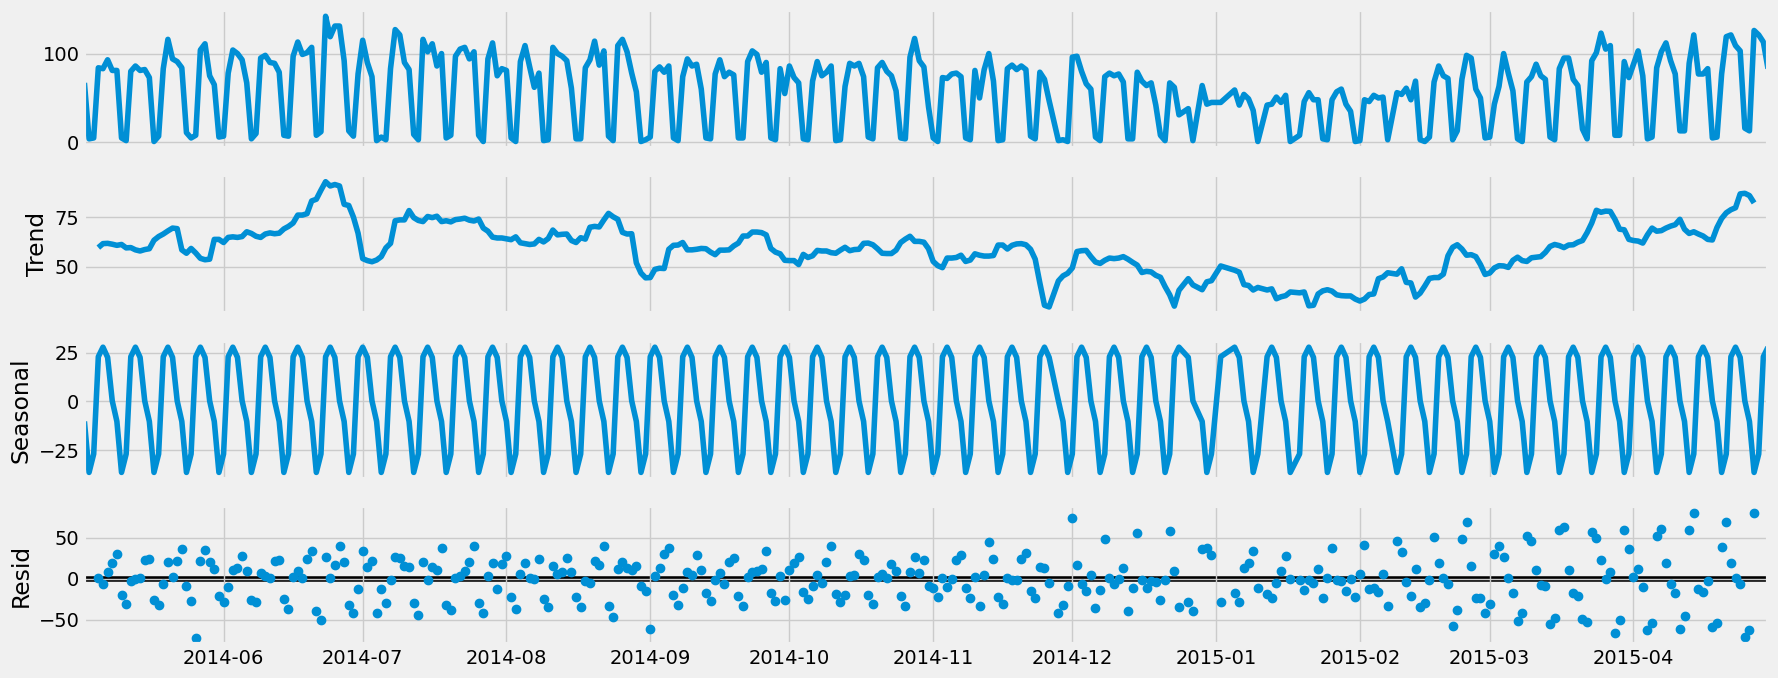

In [192]:
# Plot the separate components

decomposition.plot()
plt.show()

# 05. Testing for Stationary

In [142]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(kc_date_sub['homes_sold'])

Dickey-Fuller Stationarity test:
Test Statistic                  -1.761879
p-value                          0.399545
Number of Lags Used             13.000000
Number of Observations Used    341.000000
Critical Value (1%)             -3.449673
Critical Value (5%)             -2.870053
Critical Value (10%)            -2.571306
dtype: float64


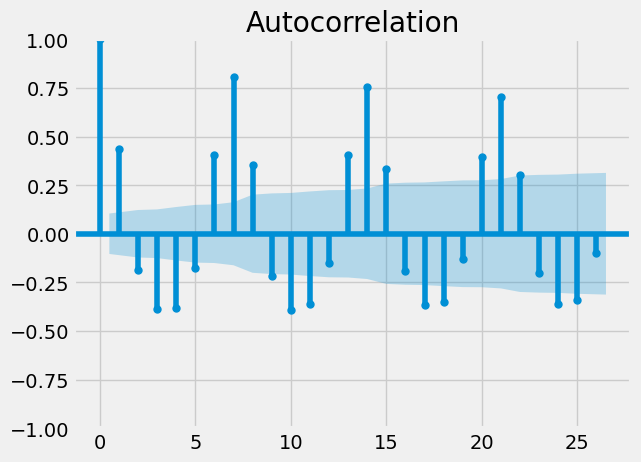

In [153]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(kc_date_sub)
plt.show()

# 06. Stationarizing the Data

In [193]:
data_diff = kc_date_sub - kc_date_sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [194]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [195]:
data_diff.head()

,homes_sold
datetime,
2014-05-03,-63.0
2014-05-04,1.0
2014-05-05,79.0
2014-05-06,-1.0
2014-05-07,10.0


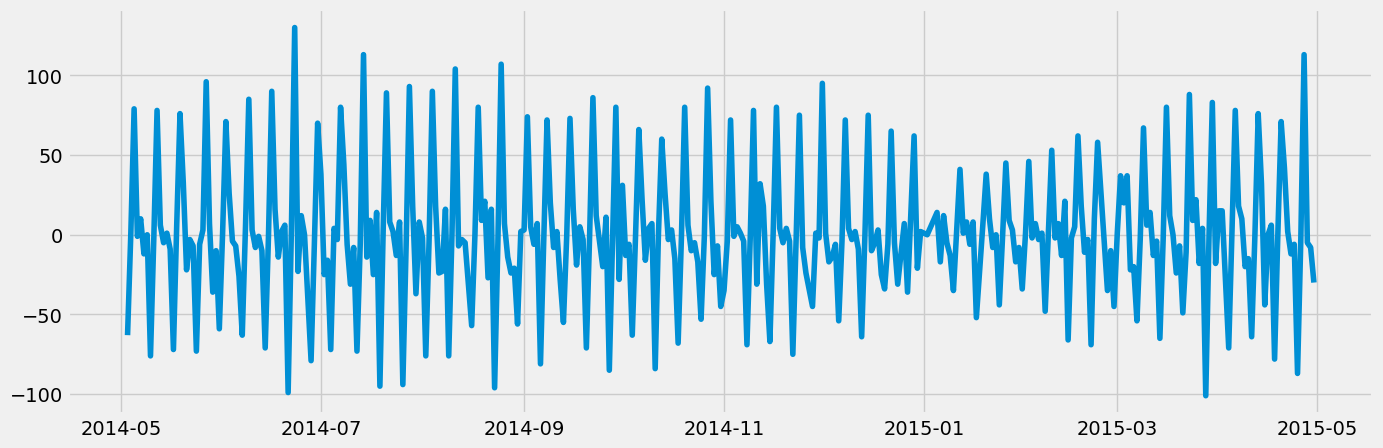

In [196]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [197]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.032602e+01
p-value                        2.924527e-18
Number of Lags Used            1.200000e+01
Number of Observations Used    3.410000e+02
Critical Value (1%)           -3.449673e+00
Critical Value (5%)           -2.870053e+00
Critical Value (10%)          -2.571306e+00
dtype: float64


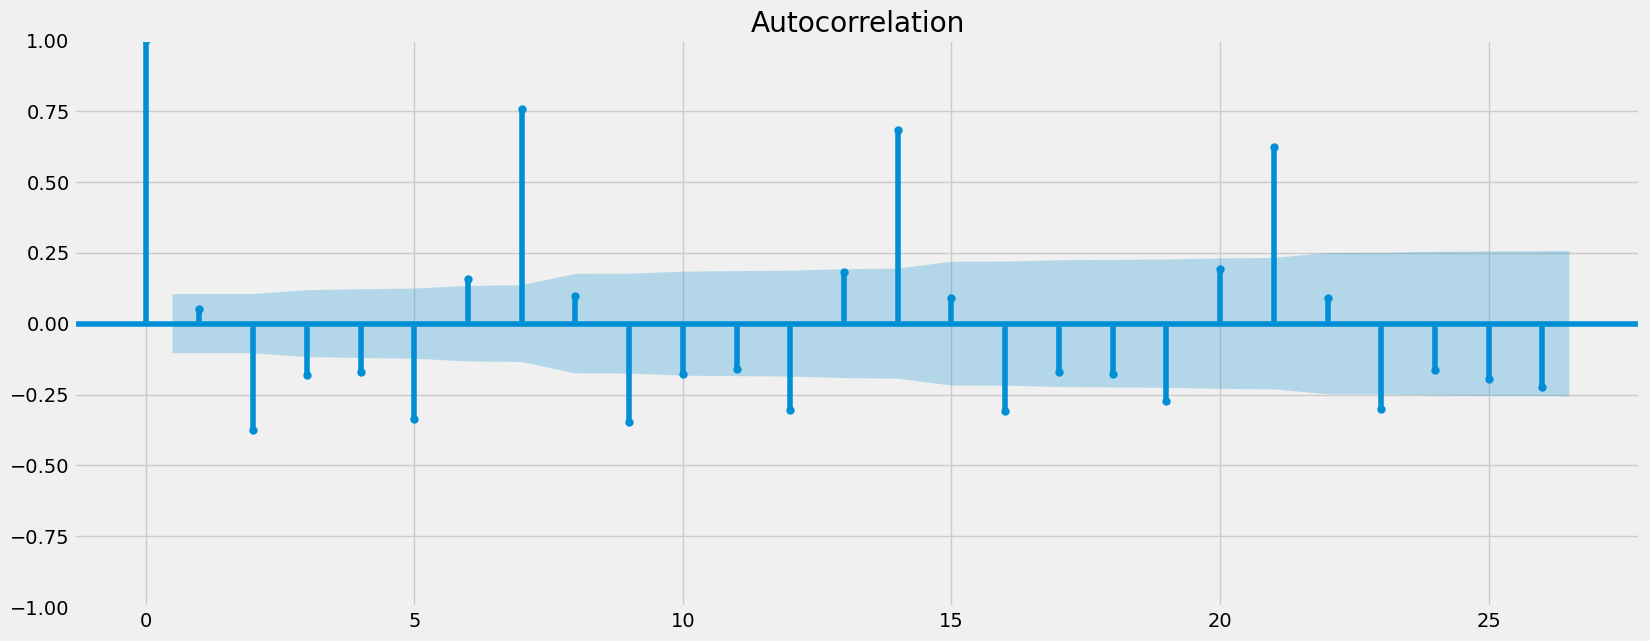

In [198]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

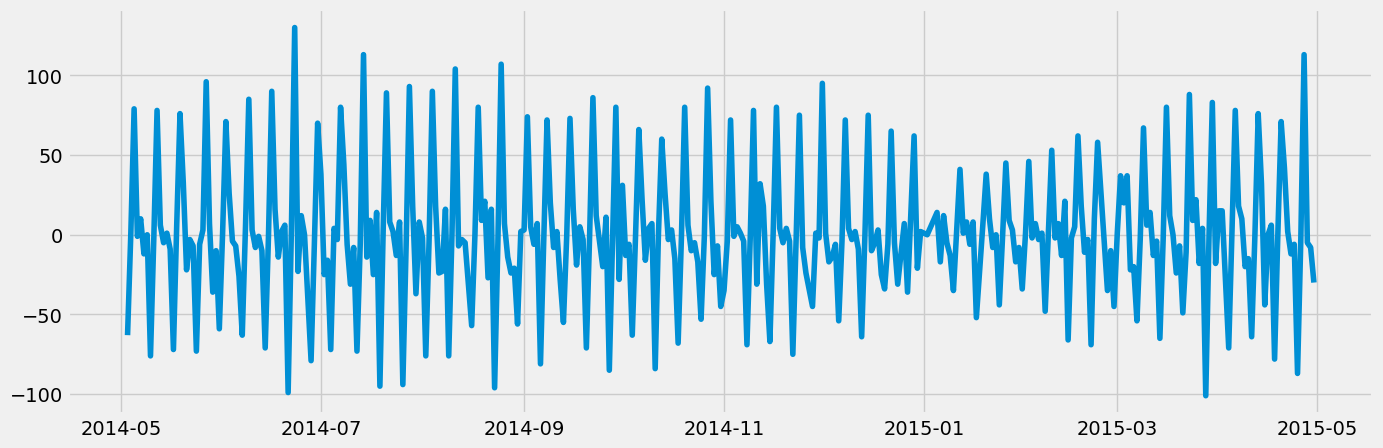

In [199]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)